Following the previous analysis, I visualize all ISs.
The figure was used to infer the path of evolution of the ISs manually.

In [1]:
library(tidyverse)
library(cowplot)
library(latex2exp)
library(gggenes)
library(IRkernel)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [2]:
input_dir = "./is_variants_analysis/full/"
figure_export_dir = file.path(input_dir, "figures")

In [3]:
#annotations <- read_tsv("./is_variants_analysis/full/annotation_of_variants.blastn", comment = '#',
annotations <- read_tsv(file.path(input_dir, "annotation_of_variants.blastn"), comment = '#',
col_names = c("sseqid", "qseqid", "qstart", "qend", "sstart", "send", "length", "evalue", "bitscore", "pident")) %>%
filter(qseqid != "Full_IS1" | length > 3000)  
reordered_levels <- annotations %>%
  group_by(sseqid) %>%
  summarise(max_s= max(sstart, send)) %>%
  arrange(desc(max_s)) %>%
  pull(sseqid)
annotations$sseqid <- factor(annotations$sseqid, levels = reordered_levels)
annotations <- annotations %>% 
	separate_wider_delim(sseqid, delim = ".", names = c("Line", "Gen", "IS"), cols_remove = F)
head(annotations)

Rows: 25077 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): sseqid, qseqid
dbl (8): qstart, qend, sstart, send, length, evalue, bitscore, pident

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Line  Gen IS sseqid     qseqid  qstart qend sstart send length evalue  
1 L10-2 3   19 L10-2.3.19 IS1-IRL 1      23     1     23  23     5.13e-06
2 L10-2 3   19 L10-2.3.19 IS1-IRL 1      23   696    718  23     5.13e-06
3 L10-2 2   20 L10-2.2.20 IS1-IRL 1      23     1     23  23     5.13e-06
4 L10-2 2   20 L10-2.2.20 IS1-IRL 1      23   695    717  23     5.13e-06
5 L02-2 2   22 L02-2.2.22 IS1-IRL 1      23     1     23  23     5.13e-06
6 L02-2 2   22 L02-2.2.22 IS1-IRL 1      23   650    672  23     5.13e-06
  bitscore pident
1 42.8     100   
2 42.8     100   
3 42.8     100   
4 42.8     100   
5 42.8     100   
6 42.8     100

## set the directions for visualization

In [4]:
# check if the length is within - 10bp or 10% of the fragment size
# [23, 699, 624, 699, 23, 3092]
# ['IS1-IRL', 'IS1FS', 'TetR', 'mScarlet-I', 'IS1-IRR', 'Full_IS1']
# create a data frame with the lengths of each qseqid
qseqid_lengths <- data.frame(
  qseqid = c('IS1-IRL', 'IS1FS', 'TetR', 'mScarlet-I', 'IS1-IRR', 'Full_IS1'),
  length.full = c(23, 699, 624, 699, 23, 3092)
)

fragment_df <- annotations %>% filter(qseqid != "Full_IS1") %>% 
left_join(qseqid_lengths, by = "qseqid") %>%
mutate(match = ifelse(length>length.full, 1, length/length.full)) 
fragment_df %>% head

Line  Gen IS sseqid     qseqid  qstart qend sstart send length evalue  
1 L10-2 3   19 L10-2.3.19 IS1-IRL 1      23     1     23  23     5.13e-06
2 L10-2 3   19 L10-2.3.19 IS1-IRL 1      23   696    718  23     5.13e-06
3 L10-2 2   20 L10-2.2.20 IS1-IRL 1      23     1     23  23     5.13e-06
4 L10-2 2   20 L10-2.2.20 IS1-IRL 1      23   695    717  23     5.13e-06
5 L02-2 2   22 L02-2.2.22 IS1-IRL 1      23     1     23  23     5.13e-06
6 L02-2 2   22 L02-2.2.22 IS1-IRL 1      23   650    672  23     5.13e-06
  bitscore pident length.full match
1 42.8     100    23          1    
2 42.8     100    23          1    
3 42.8     100    23          1    
4 42.8     100    23          1    
5 42.8     100    23          1    
6 42.8     100    23          1

In [5]:
fragment_df %>% filter(sseqid == "L05-4.1.7")

Line  Gen IS sseqid    qseqid     qstart qend sstart send length evalue  
1 L05-4 1   7  L05-4.1.7 IS1-IRL    1       23     1     23  23    5.13e-06
2 L05-4 1   7  L05-4.1.7 IS1FS      1      699   364   1062 699    0.00e+00
3 L05-4 1   7  L05-4.1.7 TetR       1      624  1234   1857 624    0.00e+00
4 L05-4 1   7  L05-4.1.7 mScarlet-I 1      699  2217   2915 699    0.00e+00
5 L05-4 1   7  L05-4.1.7 IS1-IRR    1       23  3071   3093  23    5.13e-06
  bitscore pident length.full match
1   42.8   100     23         1    
2 1261.0   100    699         1    
3 1126.0   100    624         1    
4 1261.0   100    699         1    
5   42.8   100     23         1

In [6]:
lengths <- read_csv(file.path(input_dir, "is_variant_lengths.csv"))
# reorder by length
lengths$id <- factor(lengths$id, levels = reorder(lengths$id, lengths$length))
#lengths <- lengths %>% separate(id, c("Line", "Gen", "IS"), "\.", remove = FALSE) 
lengths <- lengths %>% separate_wider_delim(id, delim = ".", names = c("Line", "Gen", "IS"), cols_remove = F)
lengths %>% head

Rows: 2369 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): id
dbl (1): length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Line  Gen IS id         length
1 L03-3 2   19 L03-3.2.19 1877  
2 L06-2 3   4  L06-2.3.4  1920  
3 L02-2 3   10 L02-2.3.10 3067  
4 L02-2 3   16 L02-2.3.16 3067  
5 L02-2 2   11 L02-2.2.11 3068  
6 L04-3 2   9  L04-3.2.9  3076

In [7]:
full_is1 <- annotations %>% filter(qseqid == "Full_IS1") %>%
group_by(sseqid) %>% mutate(color = row_number()) %>% ungroup() 
full_is1 %>% head

Line  Gen IS sseqid     qseqid   qstart qend sstart send length evalue
1 L02-1 3   5  L02-1.3.5  Full_IS1 1      3092 3696   6787 3092   0     
2 L02-4 2   16 L02-4.2.16 Full_IS1 1      3092    1   3092 3092   0     
3 L01-2 2   15 L01-2.2.15 Full_IS1 1      3092 1572   4663 3092   0     
4 L01-3 3   16 L01-3.3.16 Full_IS1 1      3092 1571   4662 3092   0     
5 L01-2 3   8  L01-2.3.8  Full_IS1 1      3092 1571   4662 3092   0     
6 L01-1 3   18 L01-1.3.18 Full_IS1 1      3092 1571   4662 3092   0     
  bitscore pident color
1 5577     100    1    
2 5577     100    1    
3 5577     100    1    
4 5577     100    1    
5 5577     100    1    
6 5577     100    1

In [8]:
#full_is1 <- full_is1 %>% filter(length > 3090)
full_is1 %>% arrange((length)) %>% head

Line  Gen IS sseqid     qseqid   qstart qend sstart send length evalue
1 L04-3 2   12 L04-3.2.12 Full_IS1 1      3076    1   3076 3076   0     
2 L04-3 2   9  L04-3.2.9  Full_IS1 1      3076    1   3076 3076   0     
3 L06-3 3   10 L06-3.3.10 Full_IS1 1      3081    1   3082 3082   0     
4 L06-3 3   7  L06-3.3.7  Full_IS1 1      3081    1   3082 3082   0     
5 L04-4 3   18 L04-4.3.18 Full_IS1 1      3086    1   3086 3087   0     
6 L04-4 3   21 L04-4.3.21 Full_IS1 1      3087 6347   3261 3088   0     
  bitscore pident  color
1 5548     100.000 1    
2 5548     100.000 1    
3 5551      99.968 1    
4 5551      99.968 1    
5 5552      99.935 1    
6 5553      99.935 2

In [9]:
annotations %>% group_by(Line) %>% summarise(n = sum(qseqid == "Full_IS1"))

Line  n 
1  L01-1 56
2  L01-2 47
3  L01-3 54
4  L01-4 51
5  L02-1 67
6  L02-2 71
7  L02-3 67
8  L02-4 76
9  L03-1 41
10 L03-2 52
11 L03-3 55
12 L03-4 60
13 L04-1 60
14 L04-2 61
15 L04-3 70
16 L04-4 73
17 L05-1 50
18 L05-2 64
19 L05-3 51
20 L05-4 60
21 L06-1 55
22 L06-2 65
23 L06-3 56
24 L06-4 58
25 L07-1 49
26 L07-2 48
27 L07-3 50
28 L07-4 50
29 L08-1 45
30 L08-2 54
31 L08-3 46
32 L08-4 48
33 L09-1 44
34 L09-2 36
35 L09-3 50
36 L09-4 37
37 L10-1 39
38 L10-2 53
39 L10-3 45
40 L10-4 49
41 L11-1 49
42 L11-2 57
43 L11-3 38
44 L11-4 63

In [10]:
library(RColorBrewer)
cols_ <- c(RColorBrewer::brewer.pal(5, "Set2")[c(3,1)], "#be1521")
labs_ <- expression(italic("tpn"), italic("tetR"), italic("rfp"))

p <- ggplot() +
  geom_segment(
    data = lengths %>% filter(Line == "L10-2"), 
    aes(x = 0, xend = length, y = id, yend = id), 
    size = 0.5, color = "grey"
  ) +
  geom_linerange(
    data = full_is1 %>% filter(Line == "L10-2"),
    aes(xmin = sstart, xmax = send, y = sseqid, linetype = as.factor(color)), 
    size = .6,
    position = position_nudge(y = 0.4)
  ) +
  scale_linetype_discrete(guide = "none") +
  geom_gene_arrow(
    data = fragment_df %>% 
      filter(Line == "L10-2") %>%
      filter(!qseqid %in% c("IS1-IRL", "IS1-IRR")) %>%
      mutate(qseqid = case_when(
        qseqid == "IS1FS" ~ "tpn",
        qseqid == "TetR" ~ "tetR",
        qseqid == "mScarlet-I" ~ "rfp",
        TRUE ~ qseqid
      )) %>%
      mutate(qseqid = factor(qseqid, levels = c("tpn", "tetR", "rfp"))),
    aes(xmin = sstart, xmax = send, y = sseqid, fill = qseqid, alpha = match == 1),
    size = 0.1,
    arrowhead_width = unit(2.5, "mm"),
    arrowhead_height = unit(2.0, "mm"),
    arrow_body_height = unit(1.0, "mm")
  ) +
  scale_alpha_discrete(guide = "none", range = c(0.5, 1), name = "") +
  scale_fill_manual(values = cols_, labels = labs_, name = "") +
  scale_x_continuous(expand = expansion(add = c(100, 0)), limits = c(0, NA)) +
  geom_gene_arrow(
    data = fragment_df %>% 
      filter(Line == "L10-2") %>%
      filter(qseqid %in% c("IS1-IRL", "IS1-IRR")),
    aes(xmin = sstart, xmax = send, y = sseqid), 
    fill = "grey",
    arrowhead_width = unit(0.5, "mm"),
    arrowhead_height = unit(1.5, "mm"),
    arrow_body_height = unit(0.1, "mm"),
    size = .3
  ) +
  facet_grid(Gen~., scales = "free_y", space = "free_y") +
  theme_minimal_vgrid(10) +
  theme(
    panel.grid.minor = element_blank(), 
    axis.text.y = element_text(hjust = 0, size = 6),
    axis.ticks.y = element_blank(), 
    axis.line.y = element_blank(),
    strip.background = element_blank(),
    strip.text.y = element_blank(), #element_text(angle = 0, size = 10),
    legend.position = "none", #c(1, 0.5), 
    legend.justification = c(1, 0.5),
  ) +
  labs(x = "Length of IS Cluster (bp)", y = "Detected IS Variants", fill = "Gene")

ggsave(file.path(figure_export_dir, "is_variants_L10-2.png"), p, width = 120, height = 110, units = "mm", dpi = 1000)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Using alpha for a discrete variable is not advised.”


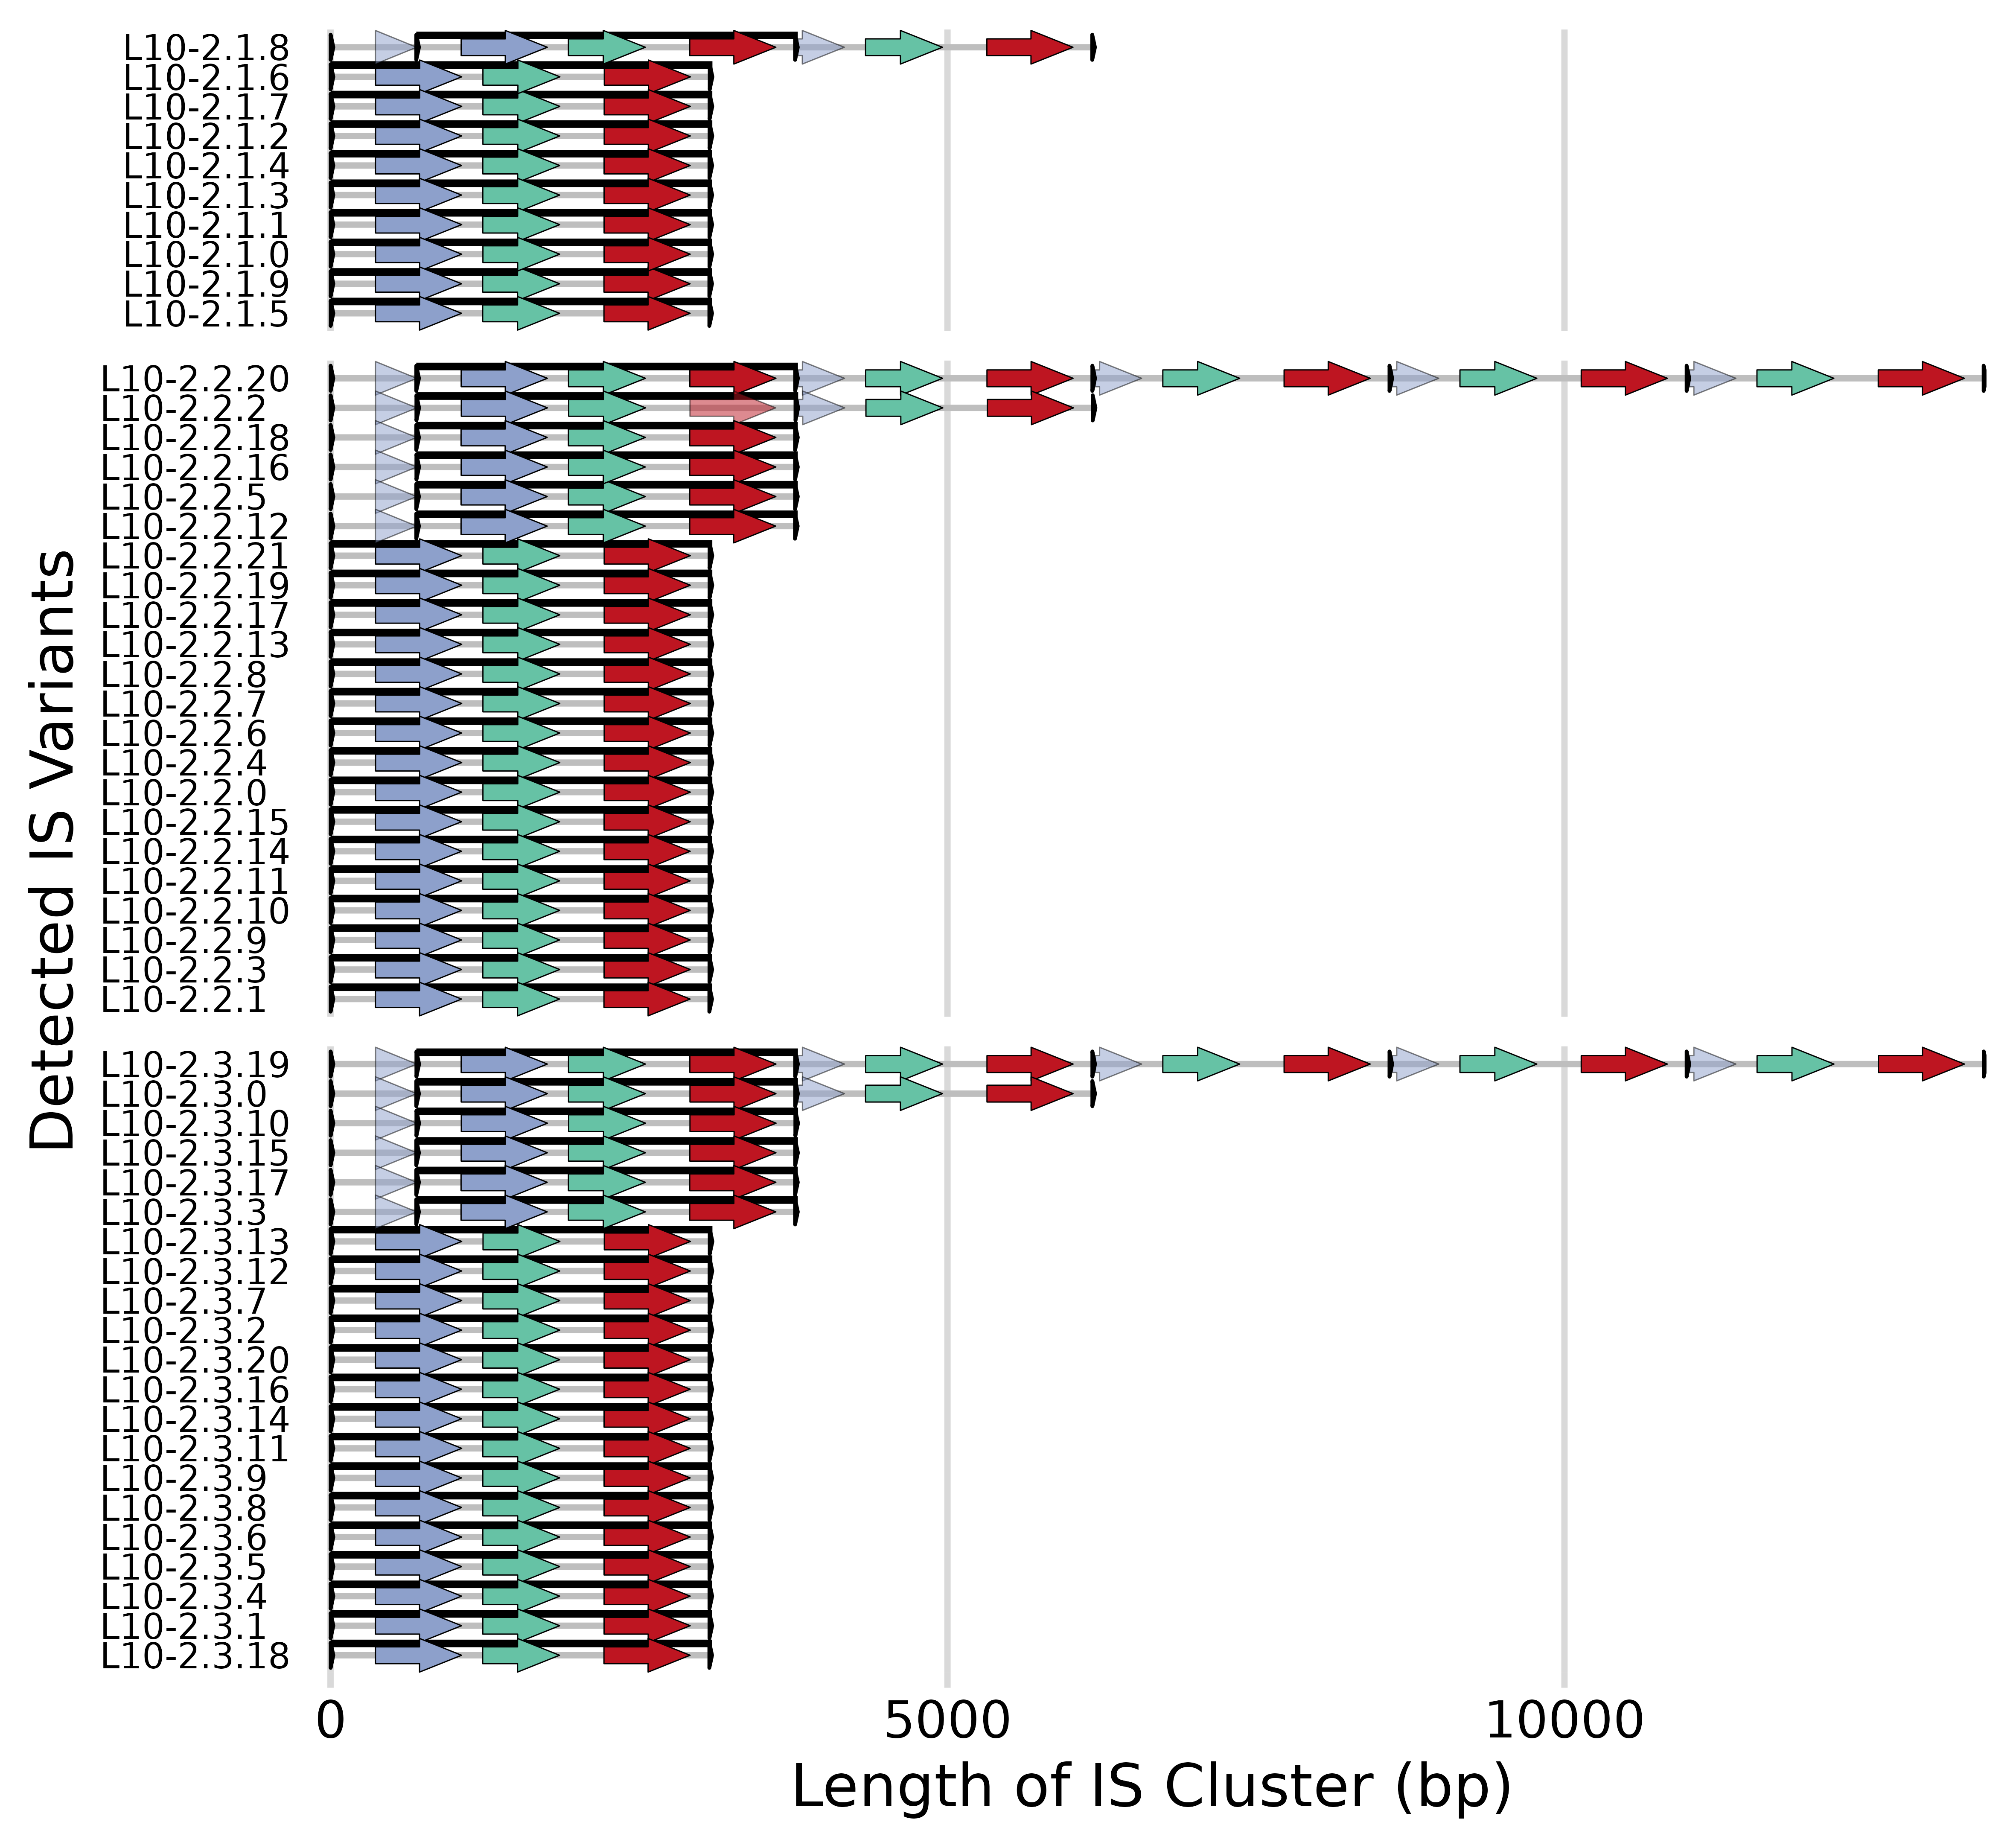

In [11]:
IRdisplay::display_png(file=file.path(figure_export_dir, "is_variants_L10-2.png"))

In [12]:
fragment_df %>% filter(Line == "L05-4")

Line  Gen IS sseqid     qseqid  qstart qend sstart send length evalue  
1   L05-4 2   15 L05-4.2.15 IS1-IRL 1      23   1      23   23     5.13e-06
2   L05-4 2   13 L05-4.2.13 IS1-IRL 1      23   1      23   23     5.13e-06
3   L05-4 3   29 L05-4.3.29 IS1-IRL 1      23   1      23   23     5.13e-06
4   L05-4 3   28 L05-4.3.28 IS1-IRL 1      23   1      23   23     5.13e-06
5   L05-4 3   27 L05-4.3.27 IS1-IRL 1      23   1      23   23     5.13e-06
6   L05-4 3   24 L05-4.3.24 IS1-IRL 1      23   1      23   23     5.13e-06
7   L05-4 3   20 L05-4.3.20 IS1-IRL 1      23   1      23   23     5.13e-06
8   L05-4 3   19 L05-4.3.19 IS1-IRL 1      23   1      23   23     5.13e-06
9   L05-4 3   18 L05-4.3.18 IS1-IRL 1      23   1      23   23     5.13e-06
10  L05-4 3   8  L05-4.3.8  IS1-IRL 1      23   1      23   23     5.13e-06
11  L05-4 3   7  L05-4.3.7  IS1-IRL 1      23   1      23   23     5.13e-06
12  L05-4 3   6  L05-4.3.6  IS1-IRL 1      23   1      23   23     5.13e-06
13  L05-4 3   4  L05-4.3.4  IS1-IRL 1      23   1      23   23     5.13e-06
14  L05-4 3   2  L05-4.3.2  IS1-IRL 1      23   1      23   23     5.13e-06
15  L05-4 3   1  L05-4.3.1  IS1-IRL 1      23   1      23   23     5.13e-06
16  L05-4 3   0  L05-4.3.0  IS1-IRL 1      23   1      23   23     5.13e-06
17  L05-4 2   14 L05-4.2.14 IS1-IRL 1      23   1      23   23     5.13e-06
18  L05-4 2   12 L05-4.2.12 IS1-IRL 1      23   1      23   23     5.13e-06
19  L05-4 2   11 L05-4.2.11 IS1-IRL 1      23   1      23   23     5.13e-06
20  L05-4 2   10 L05-4.2.10 IS1-IRL 1      23   1      23   23     5.13e-06
21  L05-4 2   9  L05-4.2.9  IS1-IRL 1      23   1      23   23     5.13e-06
22  L05-4 2   8  L05-4.2.8  IS1-IRL 1      23   1      23   23     5.13e-06
23  L05-4 2   5  L05-4.2.5  IS1-IRL 1      23   1      23   23     5.13e-06
24  L05-4 2   4  L05-4.2.4  IS1-IRL 1      23   1      23   23     5.13e-06
25  L05-4 2   0  L05-4.2.0  IS1-IRL 1      23   1      23   23     5.13e-06
26  L05-4 1   8  L05-4.1.8  IS1-IRL 1      23   1      23   23     5.13e-06
27  L05-4 1   7  L05-4.1.7  IS1-IRL 1      23   1      23   23     5.13e-06
28  L05-4 1   0  L05-4.1.0  IS1-IRL 1      23   1      23   23     5.13e-06
29  L05-4 3   26 L05-4.3.26 IS1-IRL 1      23   1      23   23     5.13e-06
30  L05-4 3   25 L05-4.3.25 IS1-IRL 1      23   1      23   23     5.13e-06
⋮   ⋮     ⋮   ⋮  ⋮          ⋮       ⋮      ⋮    ⋮      ⋮    ⋮      ⋮       
270 L05-4 3   25 L05-4.3.25 IS1-IRR 1      23   3070   3092 23     5.13e-06
271 L05-4 3   23 L05-4.3.23 IS1-IRR 1      23   3070   3092 23     5.13e-06
272 L05-4 3   22 L05-4.3.22 IS1-IRR 1      23   3070   3092 23     5.13e-06
273 L05-4 3   21 L05-4.3.21 IS1-IRR 1      23   3070   3092 23     5.13e-06
274 L05-4 3   17 L05-4.3.17 IS1-IRR 1      23   3070   3092 23     5.13e-06
275 L05-4 3   16 L05-4.3.16 IS1-IRR 1      23   3070   3092 23     5.13e-06
276 L05-4 3   15 L05-4.3.15 IS1-IRR 1      23   3070   3092 23     5.13e-06
277 L05-4 3   14 L05-4.3.14 IS1-IRR 1      23   3070   3092 23     5.13e-06
278 L05-4 3   12 L05-4.3.12 IS1-IRR 1      23   3070   3092 23     5.13e-06
279 L05-4 3   10 L05-4.3.10 IS1-IRR 1      23   3070   3092 23     5.13e-06
280 L05-4 3   9  L05-4.3.9  IS1-IRR 1      23   3070   3092 23     5.13e-06
281 L05-4 3   3  L05-4.3.3  IS1-IRR 1      23   3070   3092 23     5.13e-06
282 L05-4 2   19 L05-4.2.19 IS1-IRR 1      23   3070   3092 23     5.13e-06
283 L05-4 2   16 L05-4.2.16 IS1-IRR 1      23   3070   3092 23     5.13e-06
284 L05-4 2   7  L05-4.2.7  IS1-IRR 1      23   3070   3092 23     5.13e-06
285 L05-4 2   6  L05-4.2.6  IS1-IRR 1      23   3070   3092 23     5.13e-06
286 L05-4 2   3  L05-4.2.3  IS1-IRR 1      23   3070   3092 23     5.13e-06
287 L05-4 2   2  L05-4.2.2  IS1-IRR 1      23   3070   3092 23     5.13e-06
288 L05-4 2   1  L05-4.2.1  IS1-IRR 1      23   3070   3092 23     5.13e-06
289 L05-4 1   9  L05-4.1.9  IS1-IRR 1      23   3070   3092 23     5.13e-06
290 L05-4 1   6  L05-4.1.6  IS1-IRR 1      23   3070

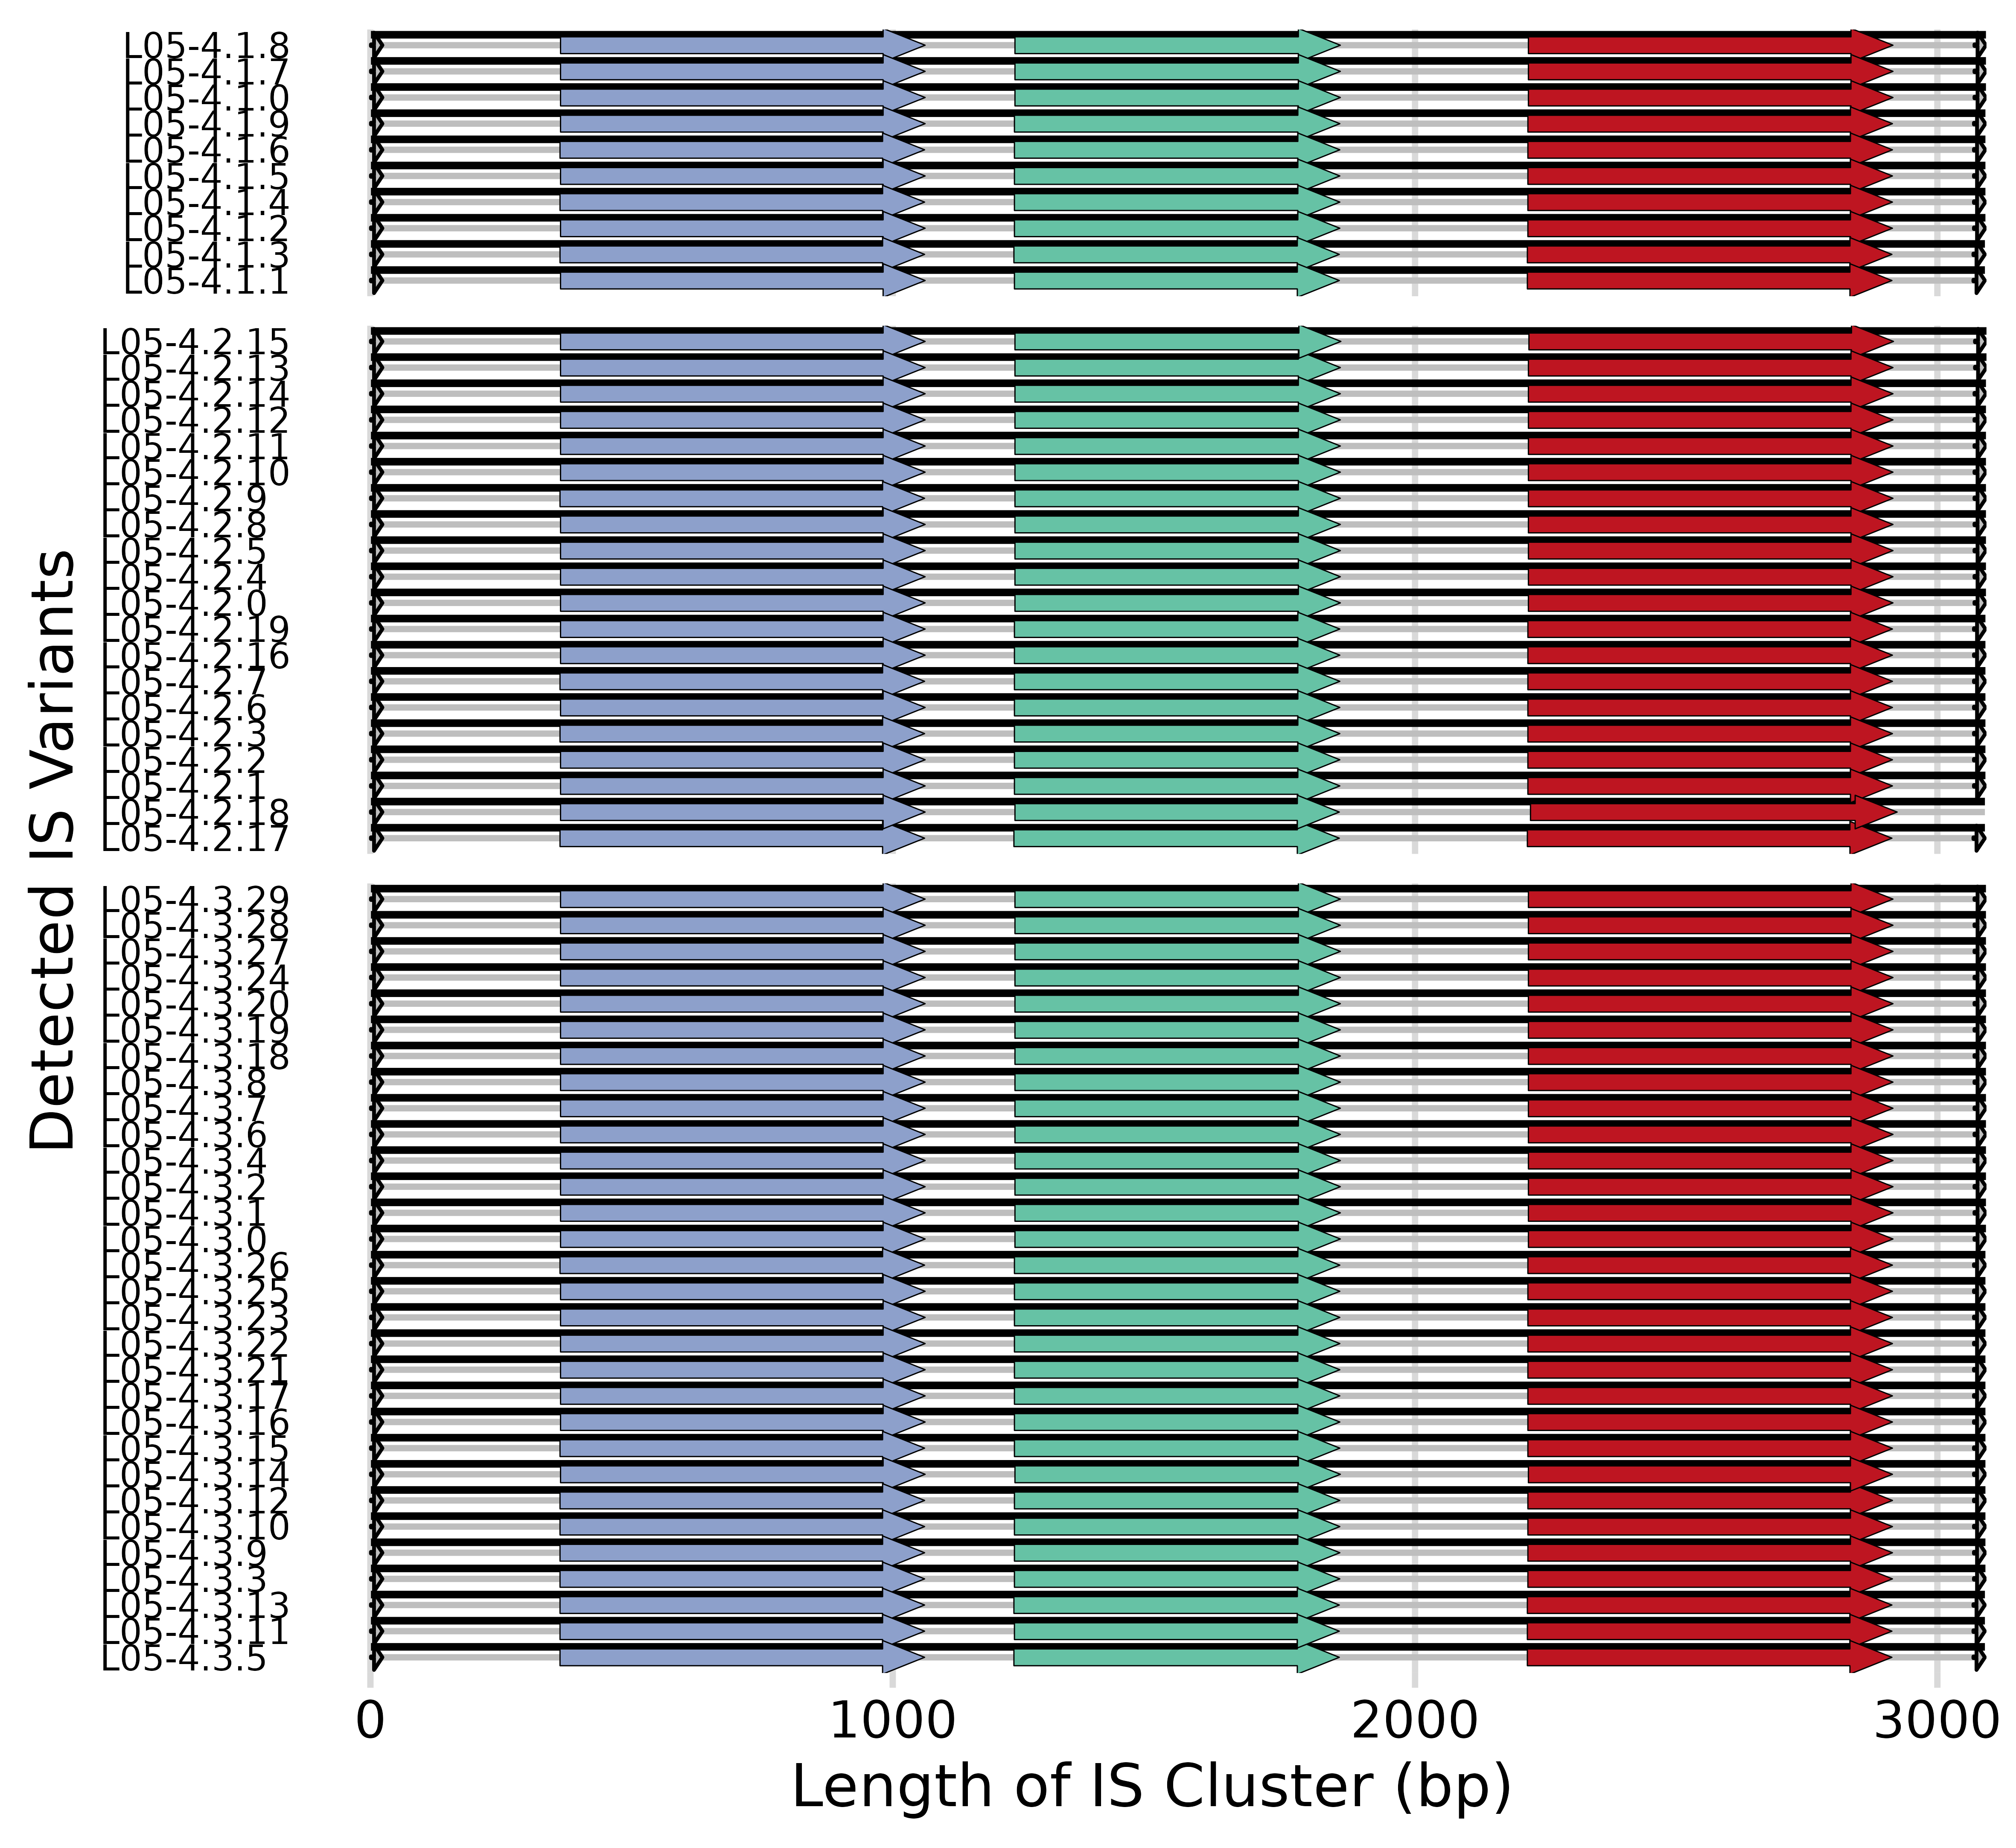

In [13]:
library(RColorBrewer)
cols_ <- c(RColorBrewer::brewer.pal(5, "Set2")[c(3,1)], "#be1521")
labs_ <- expression(italic("tpn"), italic("tetR"), italic("rfp"))

p <- ggplot() +
  geom_segment(
    data = lengths %>% filter(Line == "L05-4"), 
    aes(x = 0, xend = length, y = id, yend = id), 
    size = 0.5, color = "grey"
  ) +
  geom_linerange(
    data = full_is1 %>% filter(Line == "L05-4"),
    aes(xmin = sstart, xmax = send, y = sseqid, linetype = as.factor(color)), 
    size = .6,
    position = position_nudge(y = 0.4)
  ) +
  scale_linetype_discrete(guide = "none") +
  geom_gene_arrow(
    data = fragment_df %>% 
      filter(Line == "L05-4") %>%
      filter(!qseqid %in% c("IS1-IRL", "IS1-IRR")) %>%
      mutate(qseqid = case_when(
        qseqid == "IS1FS" ~ "tpn",
        qseqid == "TetR" ~ "tetR",
        qseqid == "mScarlet-I" ~ "rfp",
        TRUE ~ qseqid
      )) %>%
      mutate(qseqid = factor(qseqid, levels = c("tpn", "tetR", "rfp"))),
    aes(xmin = sstart, xmax = send, y = sseqid, fill = qseqid, alpha = match == 1),
    size = 0.1,
    arrowhead_width = unit(2.5, "mm"),
    arrowhead_height = unit(2.0, "mm"),
    arrow_body_height = unit(1.0, "mm")
  ) +
  #scale_alpha_discrete(guide = "none", range = c(0.5, 1), name = "") +
  scale_alpha_manual(values = c("TRUE" = 1, "FALSE" = 0.5), guide = "none", name = "") +
  scale_fill_manual(values = cols_, labels = labs_, name = "") +
  scale_x_continuous(expand = expansion(add = c(100, 0)), limits = c(0, NA)) +
  geom_gene_arrow(
    data = fragment_df %>% 
      filter(Line == "L05-4") %>%
      filter(qseqid %in% c("IS1-IRL", "IS1-IRR")),
    aes(xmin = sstart, xmax = send, y = sseqid), 
    fill = "grey",
    arrowhead_width = unit(0.5, "mm"),
    arrowhead_height = unit(1.5, "mm"),
    arrow_body_height = unit(0.1, "mm"),
    size = .3
  ) +
  facet_grid(Gen~., scales = "free_y", space = "free_y") +
  theme_minimal_vgrid(10) +
  theme(
    panel.grid.minor = element_blank(), 
    axis.text.y = element_text(hjust = 0, size = 6),
    axis.ticks.y = element_blank(), 
    axis.line.y = element_blank(),
    strip.background = element_blank(),
    strip.text.y = element_blank(), #element_text(angle = 0, size = 10),
    legend.position = "none", #c(1, 0.5), 
    legend.justification = c(1, 0.5),
  ) +
  labs(x = "Length of IS Cluster (bp)", y = "Detected IS Variants", fill = "Gene")

ggsave(file.path(figure_export_dir, "is_variants_L05-4.png"), p, width = 120, height = 110, units = "mm", dpi = 1000)
IRdisplay::display_png(file=file.path(figure_export_dir, "is_variants_L05-4.png"))

In [14]:
# Define your colors and labels
cols_ <- c(RColorBrewer::brewer.pal(5, "Set2")[c(3,1)], "#be1521")
labs_ <- expression(italic("tpn"), italic("tetR"), italic("rfp"))

# Get unique values from the Line column
line_values <- unique(lengths$Line)

# Loop through each line and create a plot
for (line in line_values) {
  p <- ggplot() +
  geom_segment(
    data = lengths %>% filter(Line == line), 
    aes(x = 0, xend = length, y = id, yend = id), 
    size = 0.5, color = "grey"
  ) +
  geom_linerange(
    data = full_is1 %>% filter(Line == line),
    aes(xmin = sstart, xmax = send, y = sseqid, linetype = as.factor(color)), 
    size = .6,
    position = position_nudge(y = 0.4)
  ) +
  scale_linetype_discrete(guide = "none") +
  geom_gene_arrow(
    data = fragment_df %>% 
      filter(Line == line) %>%
      filter(!qseqid %in% c("IS1-IRL", "IS1-IRR")) %>%
      mutate(qseqid = case_when(
        qseqid == "IS1FS" ~ "tpn",
        qseqid == "TetR" ~ "tetR",
        qseqid == "mScarlet-I" ~ "rfp",
        TRUE ~ qseqid
      )) %>%
      mutate(qseqid = factor(qseqid, levels = c("tpn", "tetR", "rfp"))),
    aes(xmin = sstart, xmax = send, y = sseqid, fill = qseqid, alpha = match == 1),
    size = 0.1,
    arrowhead_width = unit(2.5, "mm"),
    arrowhead_height = unit(2.0, "mm"),
    arrow_body_height = unit(1.0, "mm")
  ) +
  #scale_alpha_discrete(guide = "none", range = c(0.5, 1), name = "") +
  scale_alpha_manual(values = c("TRUE" = 1, "FALSE" = 0.5), guide = "none", name = "") +
  scale_x_continuous(expand = expansion(add = c(100, 0)), limits = c(0, NA)) +
  geom_gene_arrow(
    data = fragment_df %>% 
      filter(Line == line) %>%
      filter(qseqid %in% c("IS1-IRL", "IS1-IRR")),
    aes(xmin = sstart, xmax = send, y = sseqid), 
    fill = "grey",
    arrowhead_width = unit(0.5, "mm"),
    arrowhead_height = unit(1.5, "mm"),
    arrow_body_height = unit(0.1, "mm"),
    size = .3
  ) +
  facet_grid(Gen~., scales = "free_y", space = "free_y") +
  theme_minimal_vgrid(10) +
  theme(
    panel.grid.minor = element_blank(), 
    axis.text.y = element_text(hjust = 0, size = 6),
    axis.ticks.y = element_blank(), 
    axis.line.y = element_blank(),
    strip.background = element_blank(),
    strip.text.y = element_blank(), #element_text(angle = 0, size = 10),
    legend.position = "none", #c(1, 0.5), 
    legend.justification = c(1, 0.5),
  ) +
  labs(x = "Length of IS Cluster (bp)", y = "Detected IS Variants", fill = "Gene")

  # Save the plot to a file named based on the line
  file_name <- paste("is_variants_", line, ".png", sep = "")
  ggsave(file.path(figure_export_dir, "each_files", file_name), p, width = 120, height = 160, units = "mm", dpi = 1000)
  ggsave(file.path(figure_export_dir, "each_files", paste("is_variants_", line, ".pdf", sep = "")), p, width = 120, height = 160, units = "mm", dpi = 1000)
}

In [15]:
# combine PDFs
C = 'pdfunite '
for (line in line_values %>% sort) {
  C = paste(C, file.path(figure_export_dir, "each_files", paste("is_variants_", line, ".pdf", sep = "")))
}
C = paste(C, file.path(figure_export_dir, "is_variants_all.pdf"))
print(C)
system(C)

[1] "pdfunite  ./is_variants_analysis/full//figures/each_files/is_variants_L01-1.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L01-2.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L01-3.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L01-4.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L02-1.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L02-2.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L02-3.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L02-4.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L03-1.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L03-2.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L03-3.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L03-4.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L04-1.pdf ./is_variants_analysis/full//figures/each_files/is_variants_L04-2.pdf ./is_

In [16]:
C = paste('cd ', figure_export_dir)
C = paste(C, ' && ')
C = paste(C, 'pdflatex')
C = paste(C, "is_variants_all_4.tex")
print(C)
system(C)

[1] "cd  ./is_variants_analysis/full//figures  &&  pdflatex is_variants_all_4.tex"


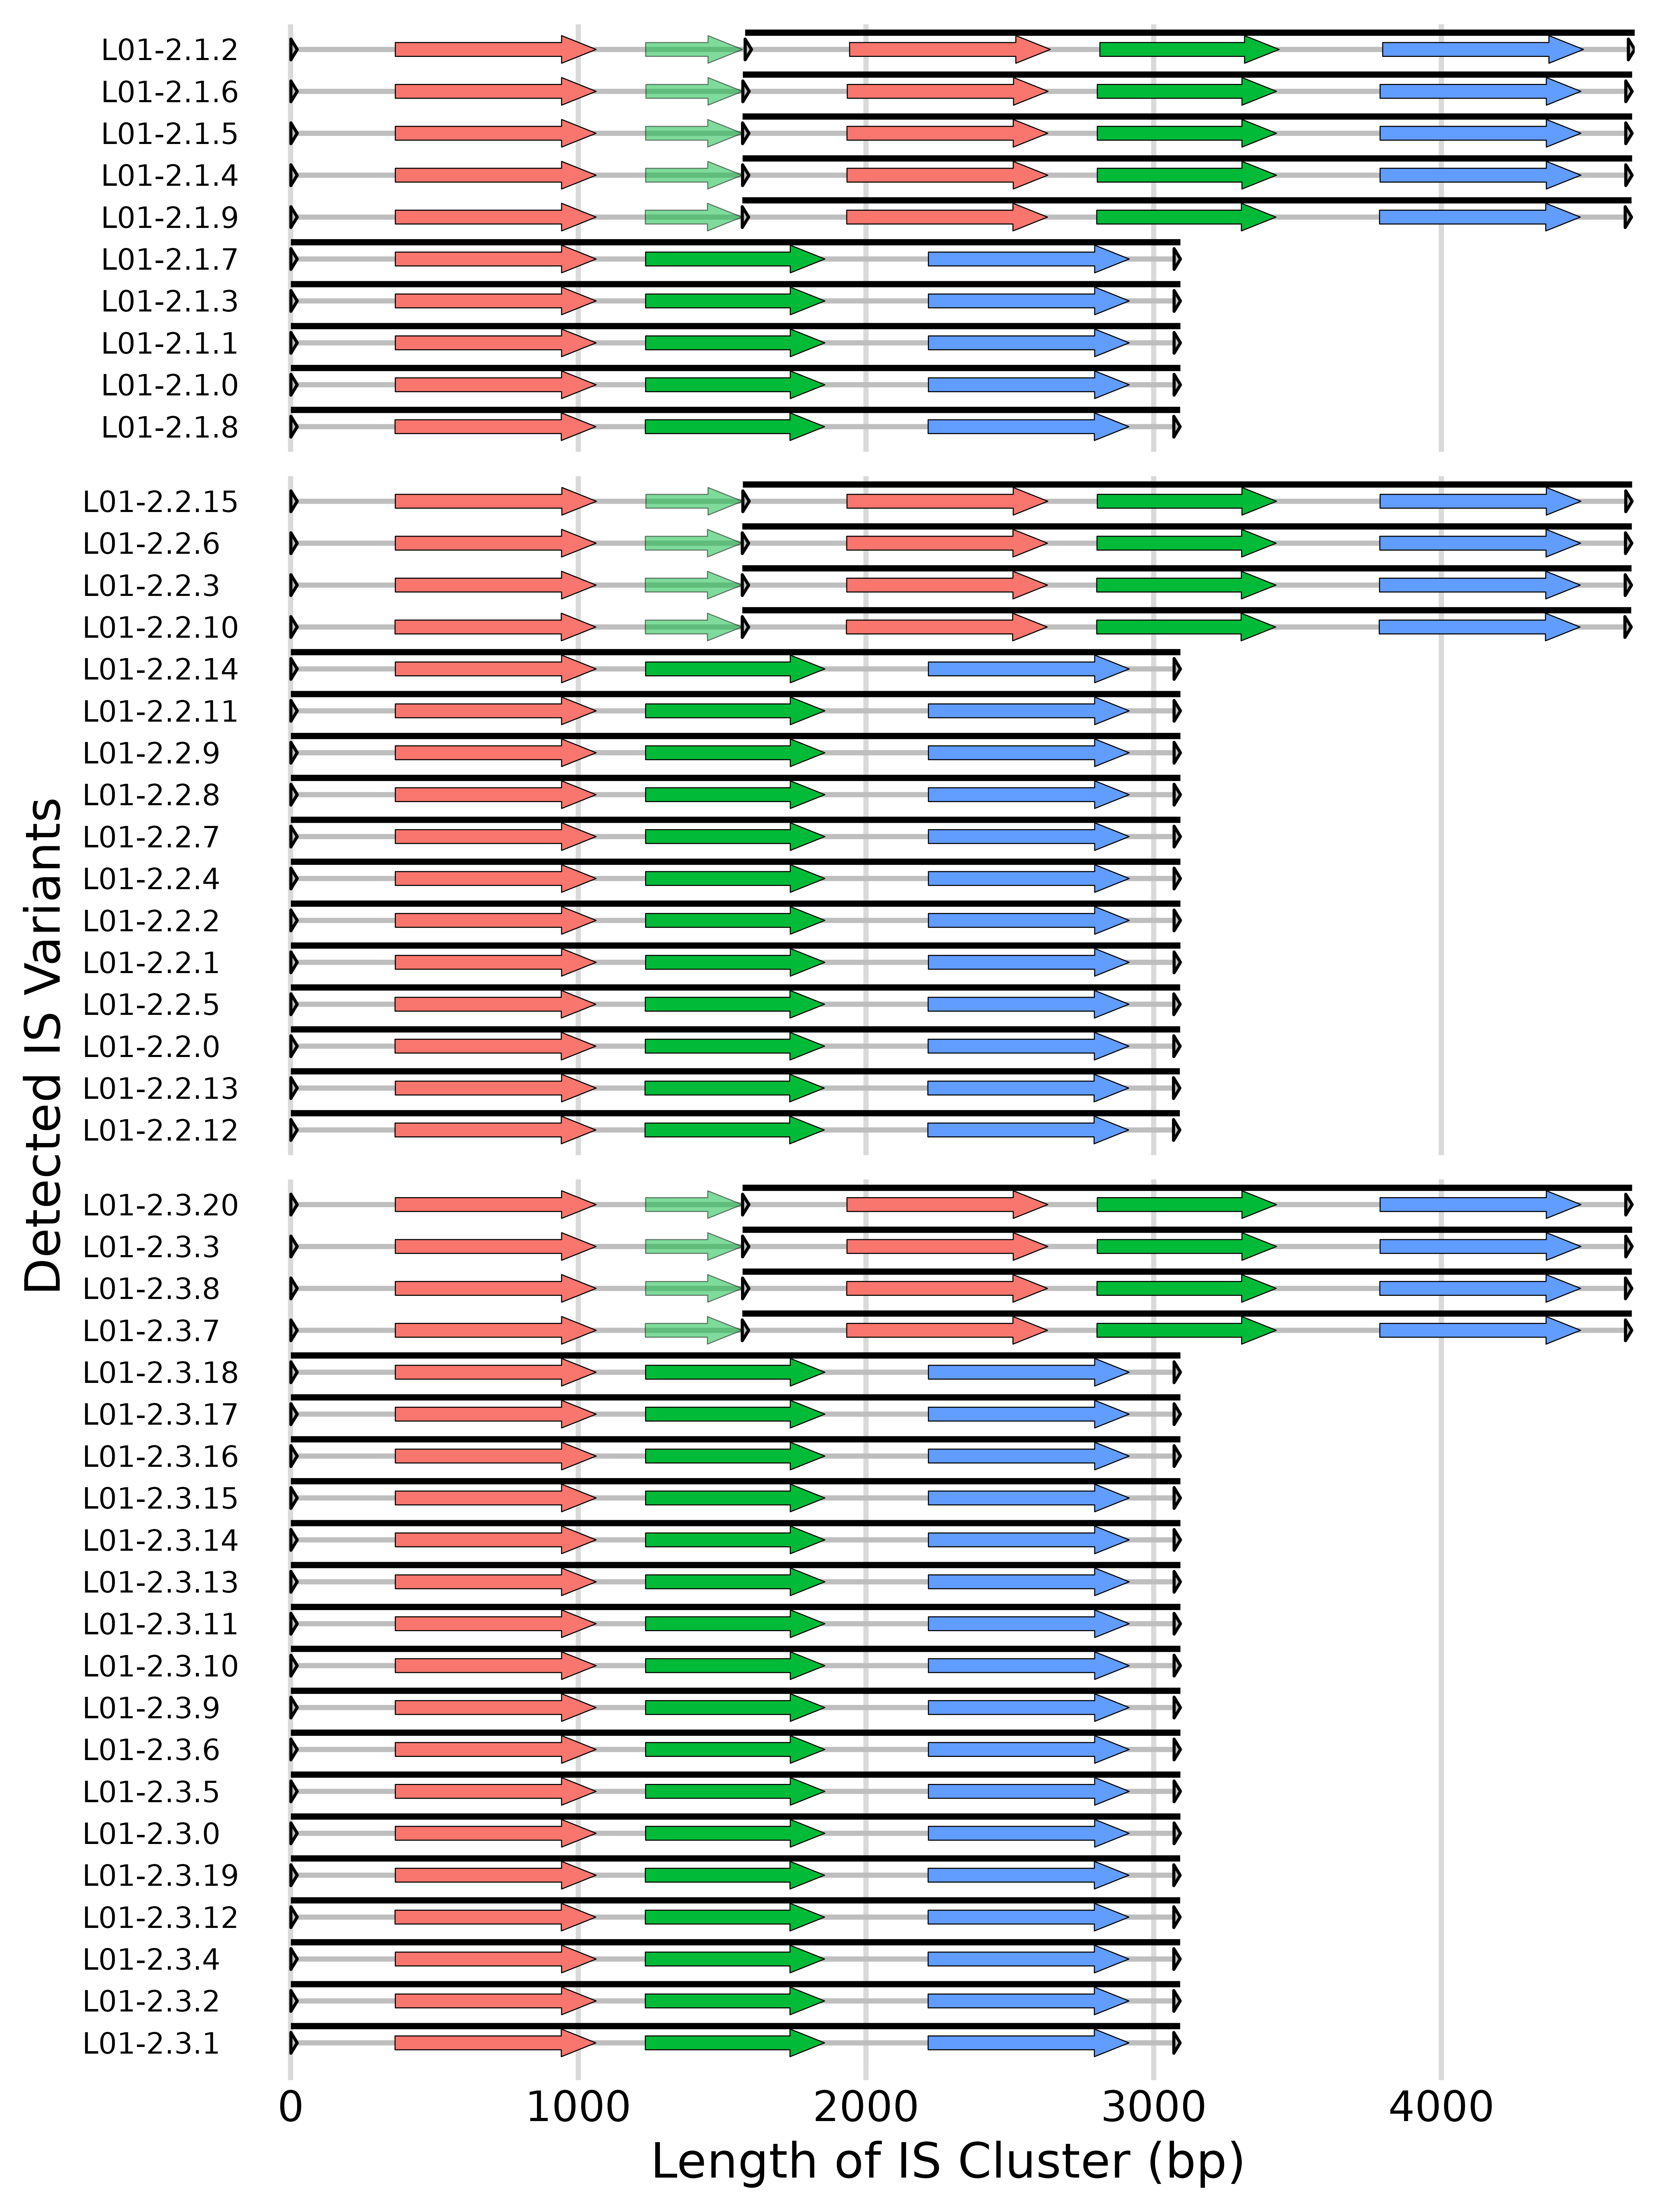

In [17]:
IRdisplay::display_png(file=file.path(figure_export_dir, "each_files", "is_variants_L01-2.png"))

## Plot for drawing schematic figure
This figure was c&p to create the schematic figure of IS evolution in line L10-3

Warning message:
“Using alpha for a discrete variable is not advised.”


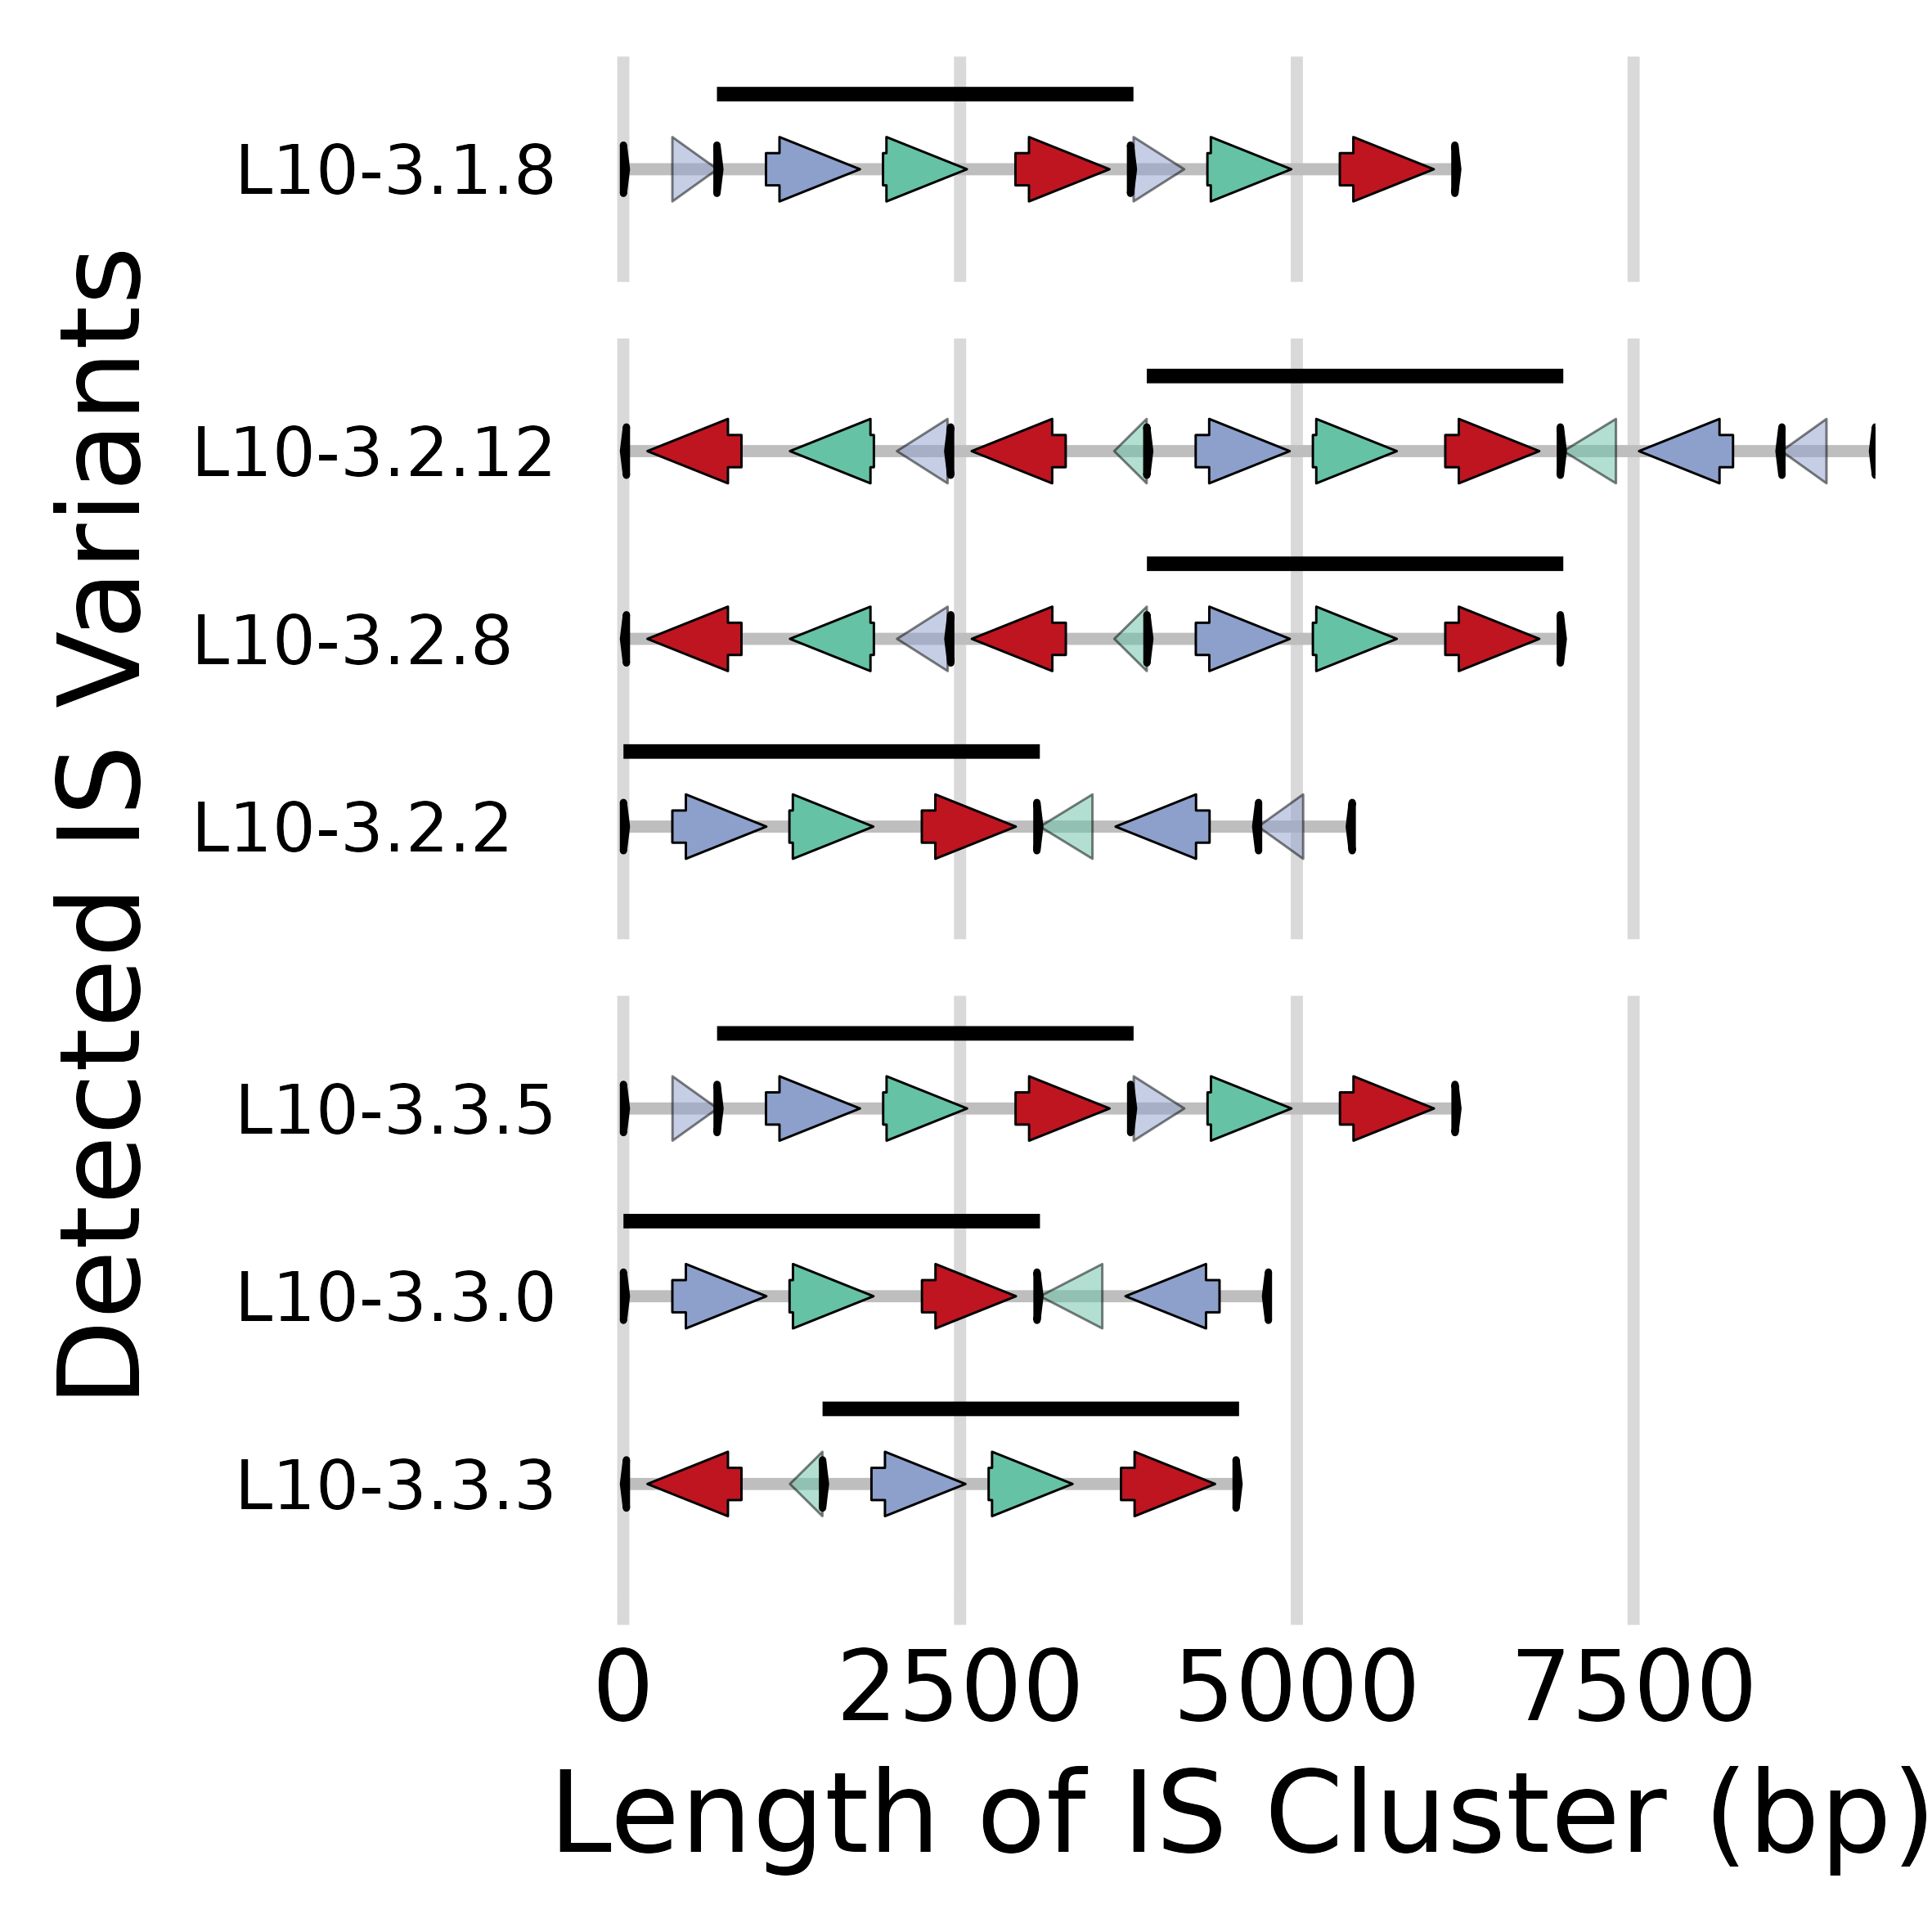

In [18]:
variants_to_display <- c(as.character(c(1.8, 2.12, 2.8, 2.2, 3.5, 3.3)), '3.0')
line <- "L10-3"

p <- ggplot() +
  geom_segment(
    data = lengths %>% filter(Line == line, paste0(Gen,".",IS) %in% variants_to_display), 
    aes(x = 0, xend = length, y = id, yend = id), 
    size = 0.5, color = "grey"
  ) +
  geom_linerange(
    data = full_is1 %>% filter(Line == line, paste0(Gen,".",IS) %in% variants_to_display),
    aes(xmin = sstart, xmax = send, y = sseqid, linetype = as.factor(color)), 
    size = .6,
    position = position_nudge(y = 0.4)
  ) +
  scale_linetype_discrete(guide = "none") +
  geom_gene_arrow(
    data = fragment_df %>% 
      filter(Line == line, paste0(Gen,".",IS) %in% variants_to_display) %>%
      filter(!qseqid %in% c("IS1-IRL", "IS1-IRR")) %>%
      mutate(qseqid = case_when(
        qseqid == "IS1FS" ~ "tpn",
        qseqid == "TetR" ~ "tetR",
        qseqid == "mScarlet-I" ~ "rfp",
        TRUE ~ qseqid
      )) %>%
      mutate(qseqid = factor(qseqid, levels = c("tpn", "tetR", "rfp"))),
    aes(xmin = sstart, xmax = send, y = sseqid, fill = qseqid, alpha = match == 1),
    size = 0.1,
    arrowhead_width = unit(2.5, "mm"),
    arrowhead_height = unit(2.0, "mm"),
    arrow_body_height = unit(1.0, "mm")
  ) +
  scale_alpha_discrete(guide = "none", range = c(0.5, 1), name = "") +
  scale_fill_manual(values = cols_, labels = labs_, name = "") +
  scale_x_continuous(expand = expansion(add = c(100, 0)), limits = c(0, NA)) +
  geom_gene_arrow(
    data = fragment_df %>% 
      filter(Line == line, paste0(Gen,".",IS) %in% variants_to_display) %>%
      filter(qseqid %in% c("IS1-IRL", "IS1-IRR")),
    aes(xmin = sstart, xmax = send, y = sseqid), 
    fill = "grey",
    arrowhead_width = unit(0.5, "mm"),
    arrowhead_height = unit(1.5, "mm"),
    arrow_body_height = unit(0.1, "mm"),
    size = .3
  ) +
  facet_grid(Gen~., scales = "free_y", space = "free_y") +
  theme_minimal_vgrid(10) +
  theme(
    panel.grid.minor = element_blank(), 
    axis.text.y = element_text(hjust = 0, size = 6),
    axis.ticks.y = element_blank(), 
    axis.line.y = element_blank(),
    strip.background = element_blank(),
    strip.text.y = element_blank(), #element_text(angle = 0, size = 10),
    legend.position = "none", #c(1, 0.5), 
    legend.justification = c(1, 0.5),
  ) +
  labs(x = "Length of IS Cluster (bp)", y = "Detected IS Variants", fill = "Gene")

dir.create(file.path(figure_export_dir, "evolution"), recursive = TRUE, showWarnings = FALSE)

# Save the plot to a file named based on the line
ggsave(file.path(figure_export_dir, "evolution", paste0("evolution_10.3", ".svg")), p, width = 60, height = 60, units = "mm", dpi = 1000)
ggsave(file.path(figure_export_dir, "evolution", paste0("evolution_10.3", ".png")), p, width = 60, height = 60, units = "mm", dpi = 1000)
ggsave(file.path(figure_export_dir, "evolution", paste0("evolution_10.3", ".pdf")), p, width = 60, height = 60, units = "mm", dpi = 1000)

IRdisplay::display_png(file=file.path(figure_export_dir, "evolution", "evolution_10.3.png"))